#### A partir del notebook "Clean" voy a mostrar los datos relevantes para las conclusiones sobre los ataques de tiburones ocurridos en distintas actividades

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sharks_data_clean = pd.read_csv("./Sharks_attack_clean.csv", encoding="ISO-8859-1")

In [3]:
sharks_data_clean.head()

,Unnamed: 0,Date,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Species,Year_clean
0,0,25-Jun-2018,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,White shark,2018
1,1,18-Jun-2018,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,NaN,2018
2,2,09-Jun-2018,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,NaN,2018
3,3,08-Jun-2018,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,2 m shark,2018
4,4,04-Jun-2018,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,"Tiger shark, 3m",2018


#### Ligera limpieza para quitar la nueva columna unnamed

In [4]:
sharks_data_clean.drop(["Unnamed: 0"], axis=1, inplace=True)

#### A partir de aqui, voy a analizar las distintas actividades. Inicialmente creo que lo más efectivo es concluir cuantas actividades distintas hay incluidas y a partir de ahi seguir

In [5]:
sharks_data_clean.Activity.value_counts()

Surfing                                                                                                                                                                                                   971
Swimming                                                                                                                                                                                                  869
Fishing                                                                                                                                                                                                   431
Spearfishing                                                                                                                                                                                              333
Bathing                                                                                                                                                                         

In [6]:
sharks_data_clean.shape

(6302, 10)

#### Gracias a la función value_counts, se puede observar que hay más de 1,500 actividades distintas pero que la gran mayoría se concentran en el top 5. Desde un punto de vista analitico y para mayor sencillez voy a generar un dataframe sólo con los registros top 5 y también para que a la hora de visualizar los resultados sea más cómodo

In [12]:
sharks_data_clean_filtered = sharks_data_clean.loc[(sharks_data_clean["Activity"] == "Surfing") | (sharks_data_clean["Activity"] == "Swimming") | (sharks_data_clean["Activity"] == "Fishing") | (sharks_data_clean["Activity"] == "Spearfishing") | (sharks_data_clean["Activity"] == "Bathing")]

In [22]:
sharks_data_clean_filtered.reset_index(inplace=True)

In [24]:
sharks_data_clean_filtered.head()

,level_0,index,Date,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Species,Year_clean
0,0,2,09-Jun-2018,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,NaN,2018
1,1,3,08-Jun-2018,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,2 m shark,2018
2,2,6,03-Jun-2018,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,Y,Tiger shark,2018
3,3,7,27-May-2018,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,N,"Lemon shark, 3'",2018
4,4,12,13-May-2018,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,M,10,N,NaN,2018


<AxesSubplot:xlabel='Activity', ylabel='count'>

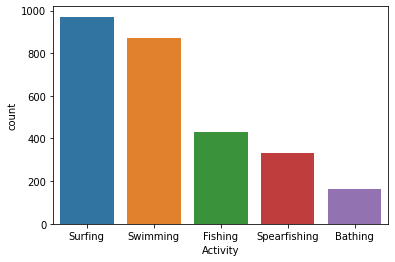

In [15]:
sns.countplot(x=sharks_data_clean_filtered.Activity)

#### Se puede ver claramente que las actividades donde hay más exposición a potenciales ataques de tiburón es en el Surf y en la Natación. Sin embargo, tengo curiosidad por analizar como se divide este analisis en 5 paises concretos que son conocidos por buenas playas para el baño y practicar surf: USA, Australia, South Africa, Brazil, y New Zeland. Por lo tanto voy a crear un nuevo DF filtrado

In [49]:
sharks_data_clean_filtered_2 = sharks_data_clean_filtered.loc[(sharks_data_clean_filtered["Country"] == "USA") | (sharks_data_clean_filtered["Country"] == "AUSTRALIA") | (sharks_data_clean_filtered["Country"] == "SOUTH AFRICA") | (sharks_data_clean_filtered["Country"] == "BRAZIL") | (sharks_data_clean_filtered["Country"] == "NEW ZEALAND")]

<AxesSubplot:xlabel='Activity', ylabel='count'>

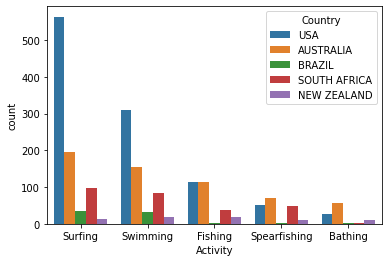

In [51]:
sns.countplot(x=sharks_data_clean_filtered_2.Activity, hue = sharks_data_clean_filtered_2.Country)

#### Se puede ver claramente que la mayoria de ataques de tiburones han ocurrido principalmente en USA y Australia. Tiene sentido con la hipotesis ya que tanto USA como Brazil tienen una gran extension de territorio costero donde habitan tiburones